### Importing the Packages

In [57]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from keplergl import KeplerGl
from matplotlib import pyplot as plt
import seaborn as sns

In [58]:
# Importing and reading the files from the data folder 

samples_df = pd.read_csv('data\RaCA_samples.csv')
pedons_df = pd.read_csv('data\RaCA_SOC_pedons.csv')
general_location_df = pd.read_csv('data\RaCa_general_location.csv')

### The best way to start is to know which Location is the data set about 

In [59]:
general_location_df['geometry'] = [Point(x,y) for x,y in zip(general_location_df['Gen_long'], general_location_df['Gen_lat'])]
general_location_gdf = gpd.GeoDataFrame(data=general_location_df, geometry=general_location_df['geometry'])
general_location_gdf.drop(columns=['Gen_lat', 'Gen_long'], inplace=True)
general_location_gdf.set_crs(epsg=4326)

,RaCA_Id,geometry
0,C0107F02,POINT (-124.65000 48.27000)
1,C0104F05,POINT (-124.52000 47.92000)
2,C0104F09,POINT (-124.50000 47.90000)
3,C0120P02,POINT (-124.49000 42.80000)
4,C0104F03,POINT (-124.48000 46.80000)
...,...,...
6400,C0606W02,POINT (-110.77000 39.46000)
6401,C0604W05,POINT (-110.99000 39.21000)
6402,C0118F04,POINT (-122.55000 44.75000)
6403,C0114F06,POINT (-122.88000 44.46000)


In [60]:
base_map_1 = KeplerGl(height=600, width=800)
base_map_1.add_data(data=general_location_gdf.copy(), name = 'area_of_interest')
base_map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'area_of_interest': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…

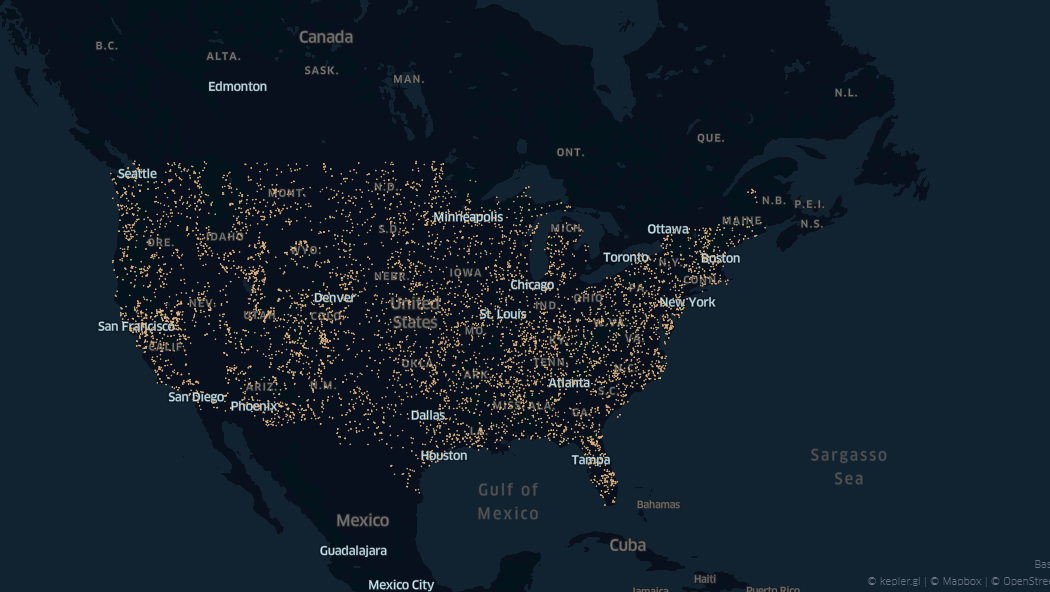

### As we can see in the KeplerGL the points and the dataset is for the United States of America

### Data Information 
The Data has been taken from Natural Resources Conservation Service Soils (United States Department of Agriculture) - [Data URL](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/?cid=nrcs142p2_054164#data_tables)

**Data Description**
1. `RaCA_data_columns_expl` - This data gives the information about the columns of the general location and pedons dataset and most importantly the breakdown of the RaCA side ID code 
1. `RaCA_general_location` - 
1. `RaCA_samples`
1. `RaCA_SOC_pedons`

Pedons - Pedons are three-dimensional bodies of soil with lateral dimensions large enough to permit the study of horizon shapes and relations. [Here](https://www.sciencedirect.com/topics/earth-and-planetary-sciences/pedon) a three-dimensional sample of a soil just large enough to show the characteristics of all its horizons.\
SOC - Soil Organic Carbon, read more [here](https://www.agric.wa.gov.au/measuring-and-assessing-soils/what-soil-organic-carbon#:~:text=Soil%20organic%20carbon%20(SOC)%20refers,to%20measure%20and%20report%20SOC.) - Soil organic carbon (SOC) refers only to the carbon component of organic compounds. Soil organic matter (SOM) is difficult to measure directly, so laboratories tend to measure and report SOC.

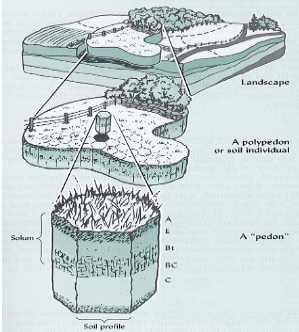\

Picture Taken From : https://www.researchgate.net/profile/Eyasu-Elias/publication/343450769/figure/fig3/AS:921214222626816@1596645994352/a-Pedon-solum-and-soil-individual-in-a-landscape-b-a-typical-soil-profile-Source.jpg

**RaCA site ID - Code**\
RaCA site ID = CxxyyLzz 
* C = placeholder character (C,A,X or F)
* xx = RaCA Region/old MO number (01 - 18)
* yy = statistical group # for MO (number varies by region)
* L = land use/land cover type (C=Cropland, F=Forest land, P=Pastureland, R=Rangeland, W=Wetland, and X=CRP)
* zz = Plot # within the group


### Requirement 1

In [30]:
# Making the List of Columns to Understand the Unique Identifier for both the datasets (Will be helpful for merging as well)
# Notes has been made

identifiers_samples = ['samp', 'sample.id', 'rcasiteid', 'pedon_no', 'upedonid', 'upedon']
identifiers_pedons = ['upedonid', 'rcasiteid', 'upedon']

In [31]:
samples_df[identifiers_samples].head(3)

,samp,sample.id,rcasiteid,pedon_no,upedonid,upedon
0,C0101F011-1,1.0,C0101F01,1,C0101F01-1,C0101F011
1,C0101F011-2,1.0,C0101F01,1,C0101F01-1,C0101F011
2,C0101F011-3,2.0,C0101F01,1,C0101F01-1,C0101F011


* `samp` - Looks the most informative, with having the rca site id (C0101F01), along with the pedon number (01) and the sample number (-1)*
* `samp` - XXXXXXXXY-Z (Where X is the rca site ID, y is the pedon number of the site, and Z is the sample number)
* We can use `upedon` and `samp` columns and remove the others

In [32]:
pedons_df.loc[pedons_df['upedon'] == 'C0101F011'][identifiers_pedons]

,upedonid,rcasiteid,upedon
43,C0101F01-1,C0101F01,C0101F011


* `upedon` - Unique RaCA pedon ID contains the site and pedon within the site
* `upedonid` - This column has lots of typos, sometimes a hyphen '-' is used sometimes an underscore '_' 

upedonid	link to User Pedon ID\
MO	Region\
MOGr	Soil Group\
LU	LU/LC class\
MOGrLU	Group and LULC class\
rcasiteid	individual RaCA site\
upedon	unique RaCA pedon ID - contains site and pedon within site\
SOCstock5	stock summed to 5 cm by fixed depth\
SOCstock30	stock summed to 30 cm by fixed depth\
SOCstock100	stock summed to 100 cm by fixed depth\
Sample_count	total no of samples\
total_thickness	max bottom depth of pedon\
SOC_count	no of samples (for this pedon) with SOC\
Lab_count	no of samples (for this pedon) with a KSSL ID\
Depth_to_R	depth to R or Cr horizon\
Non-R_SampleCount	Number of samples not including R or Cr's\
SOC_thickness	Max bottom depth with SOC measured\
USE	assigns the max depth this pedon should be used for\

In [33]:
pedons_df.drop(columns=['upedonid', 'MO','MOGr', 'MOGrLU'], inplace=True)

In [34]:
samples_df.drop(columns=['sample.id', 'pedon_no', 'upedonid'], inplace=True)

In [35]:
pedons_df.head()

,LU,rcasiteid,upedon,Sample_count,SOCstock5,SOCstock30,SOCstock100,total_thickness,SOC_count,Lab_count,Depth_to_R,Non-R_SampleCount,SOC_thickness,USE
0,P,A0108P92,A0108P921,5,15.126360,76.022073,100.113941,150,4,5,NaN,5,100,100.0
1,P,A0116P90,A0116P901,4,35.481720,95.965557,242.002573,100,4,4,NaN,4,100,100.0
2,P,A0116P94,A0116P941,3,36.827055,104.147733,293.079581,100,3,3,NaN,3,100,100.0
3,X,A0116X97,A0116X971,4,6.950620,29.854781,69.735244,100,4,4,NaN,4,100,100.0
4,R,A0120R93,A0120R931,5,13.072982,53.249971,116.996856,68,4,5,68.0,4,68,100.0


In [36]:
# Fetching the Land Use from the RaCA Side Id from upedon column and storing in a new column
# pedons_df['Land_Use'] = pedons_df['upedon'].apply(lambda x : x[5])

<AxesSubplot:>

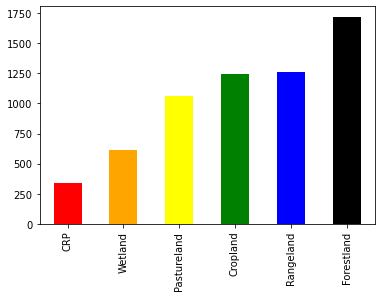

In [37]:
# Creating a dictionary to decode the Letter for the Land Use
land_use_dict = dict(C='Cropland', F='Forestland', P='Pastureland', R='Rangeland', W='Wetland', X='CRP')

# Replacing the LandUse with the Letters. 
pedons_df.replace({'LU' : land_use_dict}, inplace=True)

#Plotting the Land Use
pedons_df['LU'].value_counts().sort_values().plot(kind = 'bar', color=['red','orange','yellow','green','blue','black'])

**Based on the plot, we can say Forestlands had the most data**

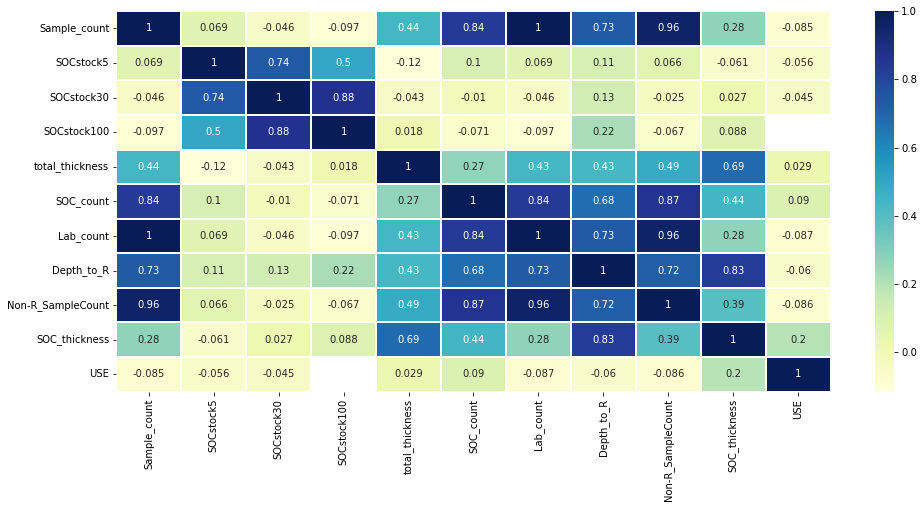

In [38]:
plt.figure(figsize=(16,7))
sns.heatmap(pedons_df.corr(), annot=True, linewidths = 0.1, cmap="YlGnBu")
plt.show()

**Sample_Count is highly corelated to Lab_Count and Non-R_SampleCount, so the later two columns can be removed.**

In [39]:
pedons_df.drop(columns=['Lab_count', 'Non-R_SampleCount', 'Depth_to_R'], inplace=True)

In [50]:
pedons_df.head()

,LU,rcasiteid,upedon,Sample_count,SOCstock5,SOCstock30,SOCstock100,total_thickness,SOC_count,SOC_thickness,USE
0,Pastureland,A0108P92,A0108P921,5,15.126360,76.022073,100.113941,150,4,100,100.0
1,Pastureland,A0116P90,A0116P901,4,35.481720,95.965557,242.002573,100,4,100,100.0
2,Pastureland,A0116P94,A0116P941,3,36.827055,104.147733,293.079581,100,3,100,100.0
3,CRP,A0116X97,A0116X971,4,6.950620,29.854781,69.735244,100,4,100,100.0
4,Rangeland,A0120R93,A0120R931,5,13.072982,53.249971,116.996856,68,4,68,100.0


In [51]:
samples_df.head()

,samp,TOP,BOT,hzn_desgn,rcasiteid,MO,MOGr,hor_top,hor_bot,fragvolc,...,c_tot_ncs,n_tot_ncs,s_tot_ncs,caco3,efferv_1nhcl,M,Model_desg,Texture,Measure_BD,Model_BD
0,C0101F011-1,0,5,oa,C0101F01,1,101,0,22,0.0,...,48.094150,2.401340,0.187482,NaN,none,O,Oa,PM,NaN,0.704913
1,C0101F011-2,5,22,oa,C0101F01,1,101,0,22,0.0,...,50.142574,1.621640,0.095915,NaN,none,O,Oa,PM,NaN,0.698567
2,C0101F011-3,22,100,oe,C0101F01,1,101,22,100,0.0,...,55.529768,1.177027,0.031538,NaN,none,O,Oe,PM,NaN,0.702053
3,C0101F012-1,0,7,oa1,C0101F01,1,101,0,7,0.0,...,43.365442,2.165691,0.078548,NaN,none,O,Oa,PM,NaN,0.694910
4,C0101F012-2,7,41,oa2,C0101F01,1,101,7,41,0.0,...,44.857623,2.438623,0.082074,NaN,none,O,Oa,PM,NaN,0.700000


In [41]:
samples_pedons_joined_df = samples_df.merge(pedons_df, how='inner', on='upedon')

In [45]:
samples_pedons_joined_df.columns

Index(['samp', 'TOP', 'BOT', 'hzn_desgn', 'rcasiteid_x', 'MO', 'MOGr',
       'hor_top', 'hor_bot', 'fragvolc', 'Bulkdensity', 'SOC_pred1', 'BD1',
       'upedon', 'LU_x', 'MOGrLU', 'hzname', 'model_desg1', 'texture',
       'BDmeasured', 'BDmethod', 'Lab.Sample.No', 'lab_proj_name',
       'submit_proj_name', 'user_site_id', 'smp_id', 'lay_field_label1',
       'lay_field_label2', 'lay_field_label3', 'lay_depth_to_top',
       'lay_depth_to_bottom', 'horizon_designation', 'natural_key', 'lay_id',
       'adod', 'c_tot_ncs', 'n_tot_ncs', 's_tot_ncs', 'caco3', 'efferv_1nhcl',
       'M', 'Model_desg', 'Texture', 'Measure_BD', 'Model_BD', 'LU_y',
       'rcasiteid_y', 'Sample_count', 'SOCstock5', 'SOCstock30', 'SOCstock100',
       'total_thickness', 'SOC_count', 'SOC_thickness', 'USE'],
      dtype='object')

In [44]:
samples_pedons_joined_df['LU_x']
samples_pedons_joined_df['LU_y']

0       Forestland
1       Forestland
2       Forestland
3          Wetland
4          Wetland
           ...    
7675      Cropland
7676      Cropland
7677      Cropland
7678      Cropland
7679      Cropland
Name: LU_y, Length: 7680, dtype: object